### 파이썬 Reliability 라이브러리를 사용한 신뢰성 분석

#### 사용한 라이브러리 소개

- Pandas : 데이터프레임 자료구조 전처리용
- __Reliability : 수명 분석용 라이브러리__
- matplotlib : 데이터 시각화를 위한 라이브러리

In [1]:
#### Reliability 라이브러리 ####

import pandas as pd
from reliability.Fitters import Fit_Weibull_2P

data = pd.read_csv(r"C:\sample_data\WeibullDataSet.csv")

# 데이터프레임 -> 리스트 자료형 변환

data_fail = data['Suspension'] == 'F'
data_censored = data['Suspension'] == 'S'

data_fail = data[data_fail]
data_censored = data[data_censored]

list_fail = data_fail['runDay'].tolist()
list_censored = data_censored['runDay'].tolist()


# reliability 라이브러리 실행해 결과 확인

my_weibull = Fit_Weibull_2P(failures = list_fail, right_censored = list_censored, show_probability_plot= False)

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 130/3406 (96.32353% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI    Upper CI
    Alpha     1.29498e+06          803576    383764 4.36979e+06
     Beta        0.477968       0.0412861  0.403527     0.56614 

Goodness of fit    Value
 Log-likelihood -1447.88
           AICc  2899.76
            BIC   2912.1
             AD  3052.04 



Text(0, 0.5, 'Percentage')

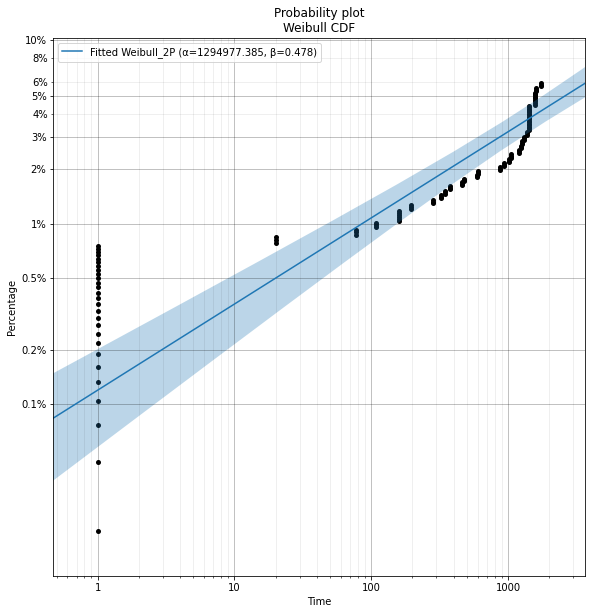

In [2]:
#### Reliability 라이브러리 plot 그리기 및 저장 #### 

from reliability.Probability_plotting import Weibull_probability_plot
import matplotlib.pyplot as plt

Weibull_probability_plot(failures = list_fail, right_censored = list_censored)
plt.ylabel('Percentage')